In [1]:
import sklearn
import os
from skimage import data, io
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math



In [2]:
# devolve o path para uma imagem baseado em seu photo_id
def get_file(f, obj_class = None):
    obj_class = data.loc[f, "obj_class"]
    file_name = data.loc[f, "file_name"]
    return ("classes/" + obj_class + "/" + file_name)

# devolve photo_id da imagem
def get_image(obj_id, bg, loc, light):
    return data[(data["obj_id"] == obj_id) & (data["background"] == bg) & 
                (data["location"] == loc) & (data["light"] == light)]["photo_id"].sample(n = 1).values[0]

# devolve uma combinação aleatória de fundo, local e luz 
def random_bll():
    return (random.choice(["w", "g", "b"]), random.choice(["i", "o"]), random.choice(["d", "n"]))



In [3]:
def plot_images(obj_id, bg = None, loc = None, light = None):
    if (bg == None):
        bg, loc, light = random_bll()
        
    fig=plt.figure(figsize=(10, 10))
    columns = 4
    rows = math.ceil(columns / (len(obj_id)))
    i = 1
    
    fig.suptitle(classe + " (" + bg + ", " +loc + ", " + light + ")", fontsize=16)
    for obj in obj_id:
        img = get_file(get_image(obj, bg, loc, light))
        fig.add_subplot(5, 4, i)
        img = plt.imread(img)
        plt.imshow(img)
        i+=1
    plt.subplots_adjust(hspace=0.2)
    
    plt.tight_layout()
    plt.show()    
    
    
#  plots images based on their photo_id
def plot_images2(photo_id, classe, title, size = 10):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(size, size))

    columns = 4
    rows = math.ceil(columns / (len(photo_id)))
    i = 1
    fig.suptitle(title, fontsize=16)
    


    for photo in photo_id:
        img = "classes/" + classe + "/" + photo
        fig.add_subplot(4, 3, i)
        img = plt.imread(img)
        plt.imshow(img)
        i+=1
        
    for ax in axes[:,0]:
        ax.set_axis_off()
        
    for ax in axes[:,1]:
        ax.set_axis_off()
        
    for ax in axes[:,2]:
        ax.set_axis_off()
    
    plt.subplots_adjust(hspace=0.2)
    plt.tight_layout()
    plt.show()   
    

In [4]:
data = pd.read_csv('Visao - metadata.csv', header=0)

##  Tabela descrevendo o dataframe

### Legenda adotada:

**photo_id**: int de 0 a 1, ID único da foto

**obj_id**: no formato classe_n, ID único do objeto

**obj_class**: classe do item

**file_name**: nome do arquivo

**background**: fundo da foto\
&nbsp;&nbsp;&nbsp;&nbsp;**w:** white\
&nbsp;&nbsp;&nbsp;&nbsp;**b:** black\
&nbsp;&nbsp;&nbsp;&nbsp;**g:** gray
    
**location:** local onde a foto foi tirada\
&nbsp;&nbsp;&nbsp;&nbsp;**i:** inside\
&nbsp;&nbsp;&nbsp;&nbsp;**o:** outside
    
**light:** hora do dia que a foto foi dirada\
&nbsp;&nbsp;&nbsp;&nbsp;**d:** day\
&nbsp;&nbsp;&nbsp;&nbsp;**n:** night

**bll**: background, location & light. String que concatena os 3 valores anteriores.

In [5]:
# percentile list 
perc =[.20, .40, .60, .80]
# list of dtypes to include 
include =['object', 'float', 'int'] 

desc = data.describe(include = include)[:4]
desc

,photo_id,obj_id,obj_class,file_name,background,location,light,bll
count,1044.0,1044,1044,1044,1044,1044,1044,1044
unique,NaN,29,5,1044,3,2,2,12
top,NaN,esmalte_1,esmalte,IMG_2250.jpg,b,i,n,bid
freq,NaN,36,252,1,349,522,522,88


## Imagem 1
Ilustração de todos os itens presentes no dataset. Foi selecionada um background / location / light aleatório para cada classe.

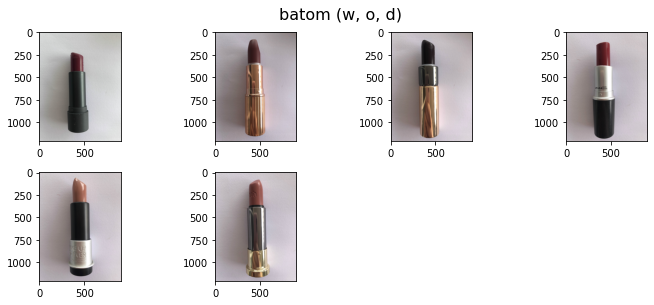

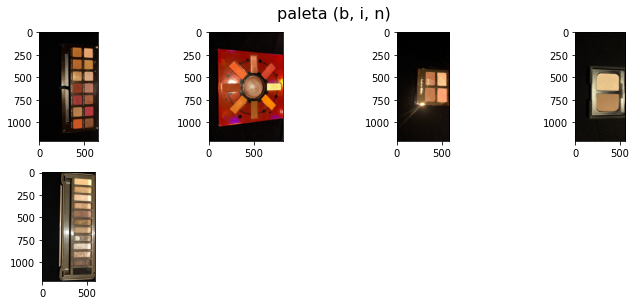

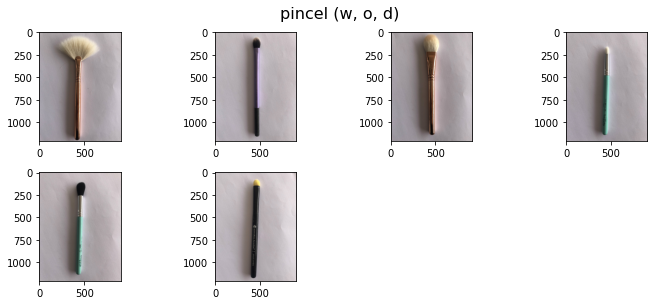

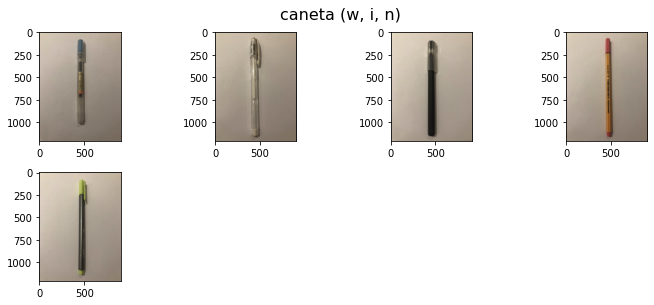

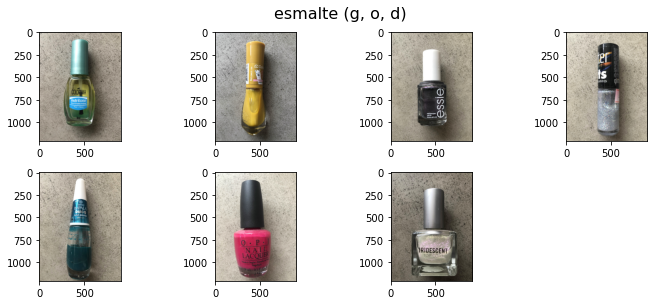

In [6]:
for classe in data.obj_class.unique():
    c = data[data["obj_class"] == classe]
    obj_id = c.obj_id.unique()
    plot_images(obj_id)

## Imagem 2
Com a comparação abaixo, fica fácil visualizar o impacto que a iluminação, horário do dia e fundo da foto fazem na imagem do pincel. 

As duas primeiras linhas são fotos tiradas de dia. As duas últimas, à noite. As linhas 1 e 3 foram tiradas dentro de casa. As 2 e 4, fora. 

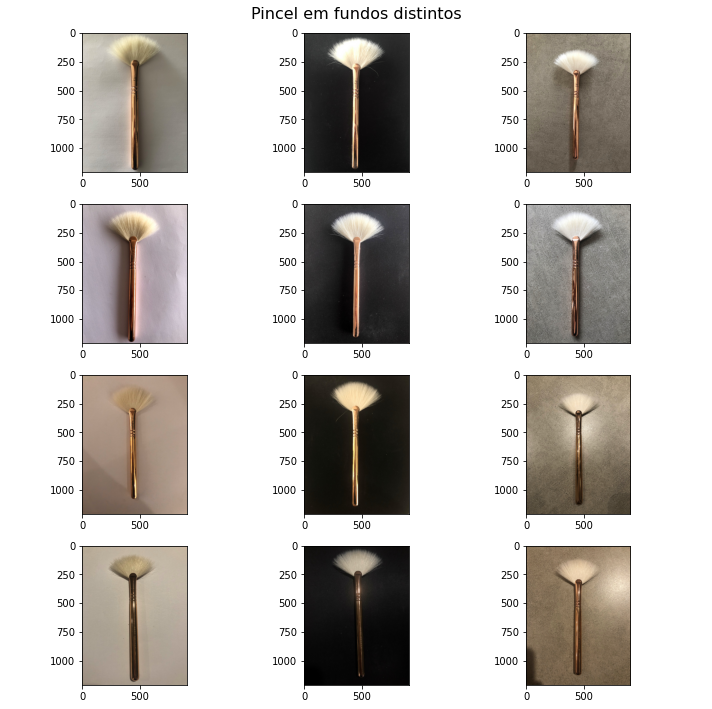

In [7]:
pincel0 = data.loc[data['obj_id']=='pincel_0']

pincel0 = pincel0.iloc[::3, :] 

plot_images2(pincel0["file_name"], "pincel", "Pincel em fundos distintos")

## Imagem 3
Todas as fotos foram tiradas em triplicata. Estão representadas na imagem abaixo.

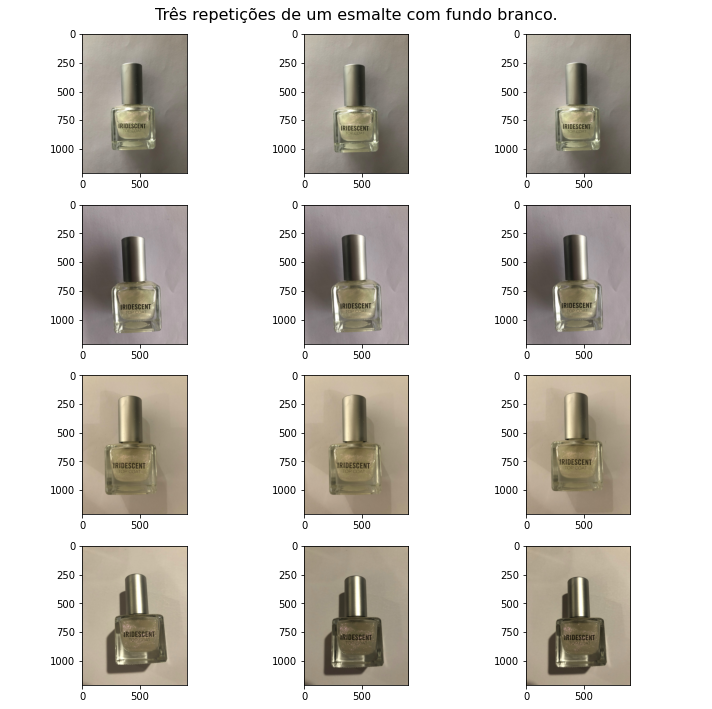

In [8]:
esmalte6 = data.loc[data['obj_id']=='esmalte_6']

esmalte6 = esmalte6.loc[esmalte6['background'] == "w"]

plot_images2(esmalte6["file_name"], "esmalte", "Três repetições de um esmalte com fundo branco.")
